In [1]:
# load dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, Normalizer
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import time

In [2]:
# read in data
raw_data = pd.read_csv("data.csv")
# remove NaN column
raw_data = raw_data.iloc[:,:-1]
# change 'diagnosis' column values to 1 or 0
raw_data['diagnosis'] = raw_data['diagnosis'].apply(lambda x: '1' if x == 'M' else '0')
# change 'id' column to index
raw_data = raw_data.set_index('id')

# assign X, y data set and split to training and testing data sets
y = raw_data['diagnosis']
X = raw_data.drop('diagnosis', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=42)

In [4]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)

print('The accuracy on the training subset: {:.3f}'.format(svm_model.score(X_train_scaled, y_train)))
print('The accuracy on the testing subset: {:.3f}'.format(svm_model.score(X_test_scaled, y_test)))

The accuracy on the training subset: 0.987
The accuracy on the testing subset: 0.977


Feature ranking:
1. feature 23 (0.257927)
2. feature 20 (0.159351)
3. feature 6 (0.139499)
4. feature 27 (0.098368)
5. feature 10 (0.059431)
6. feature 0 (0.059188)
7. feature 22 (0.050366)
8. feature 7 (0.030044)
9. feature 1 (0.021707)
10. feature 5 (0.012716)
11. feature 28 (0.012715)
12. feature 25 (0.012090)
13. feature 24 (0.011372)
14. feature 26 (0.008255)
15. feature 11 (0.007764)
16. feature 19 (0.007686)
17. feature 21 (0.007346)
18. feature 3 (0.006954)
19. feature 16 (0.006004)
20. feature 17 (0.004563)
21. feature 8 (0.004399)
22. feature 18 (0.003910)
23. feature 13 (0.003867)
24. feature 15 (0.003779)
25. feature 29 (0.003618)
26. feature 9 (0.003119)
27. feature 12 (0.002685)
28. feature 14 (0.001279)
29. feature 4 (0.000000)
30. feature 2 (0.000000)


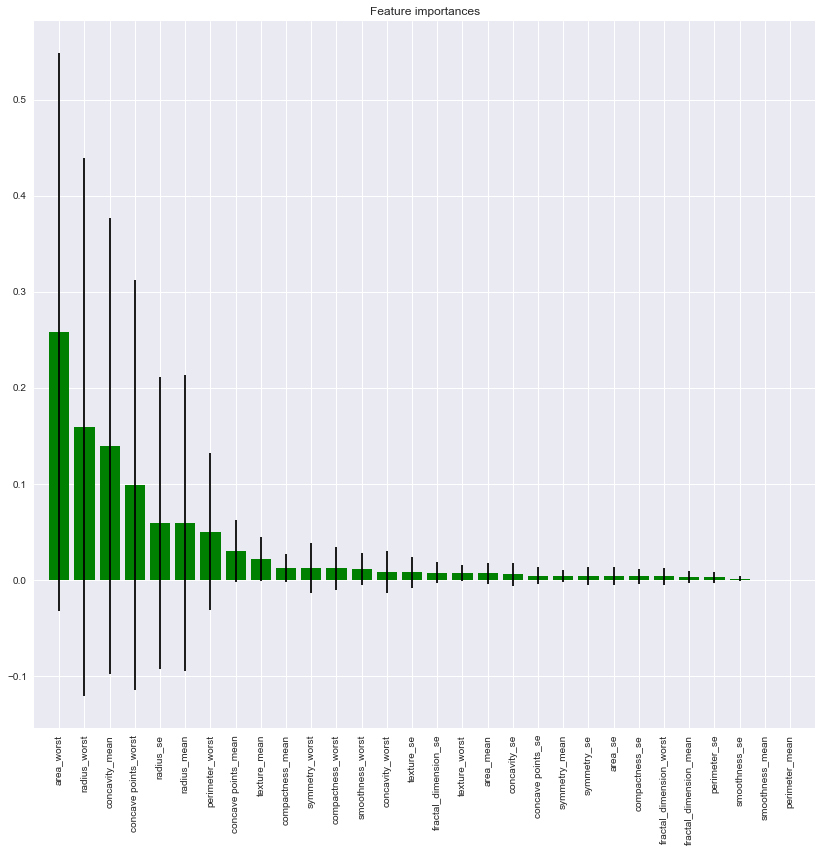

In [6]:
clf_rf_1 = RandomForestClassifier()      
clr_rf_1 = clf_rf_1.fit(X_train_scaled,y_train)
importances = clr_rf_1.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf_1.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train_scaled.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(X_train_scaled.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(X_train_scaled.shape[1]), X_train.columns[indices],rotation=90)
plt.xlim([-1, X_train_scaled.shape[1]])
plt.show()

Feature ranking:
1. feature 2 (0.186452)
2. feature 27 (0.182281)
3. feature 7 (0.143624)
4. feature 20 (0.093499)
5. feature 23 (0.084635)
6. feature 3 (0.056208)
7. feature 24 (0.031941)
8. feature 25 (0.031708)
9. feature 22 (0.023964)
10. feature 1 (0.020839)
11. feature 26 (0.020251)
12. feature 21 (0.014650)
13. feature 10 (0.013073)
14. feature 16 (0.012663)
15. feature 6 (0.010556)
16. feature 13 (0.009186)
17. feature 28 (0.008548)
18. feature 17 (0.008294)
19. feature 18 (0.007684)
20. feature 14 (0.006490)
21. feature 0 (0.006061)
22. feature 29 (0.004941)
23. feature 12 (0.004349)
24. feature 4 (0.004225)
25. feature 19 (0.004059)
26. feature 9 (0.003969)
27. feature 5 (0.002157)
28. feature 8 (0.002036)
29. feature 15 (0.001578)
30. feature 11 (0.000080)


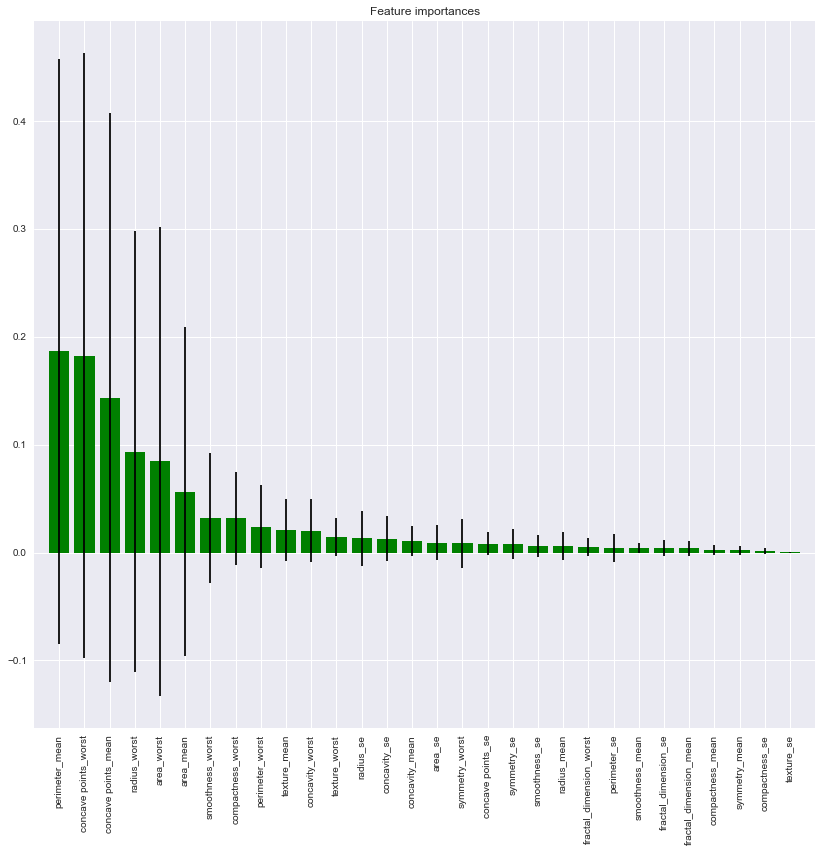

In [7]:
clf_rf_2 = RandomForestClassifier()      
clr_rf_2 = clf_rf_2.fit(X_train,y_train)
importances = clr_rf_2.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf_2.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices],rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [9]:
#normalization
X_train_N = (X_train-X_train.mean())/(X_train.max()-X_train.min())
X_test_N = (X_test-X_test.mean())/(X_test.max()-X_test.min())

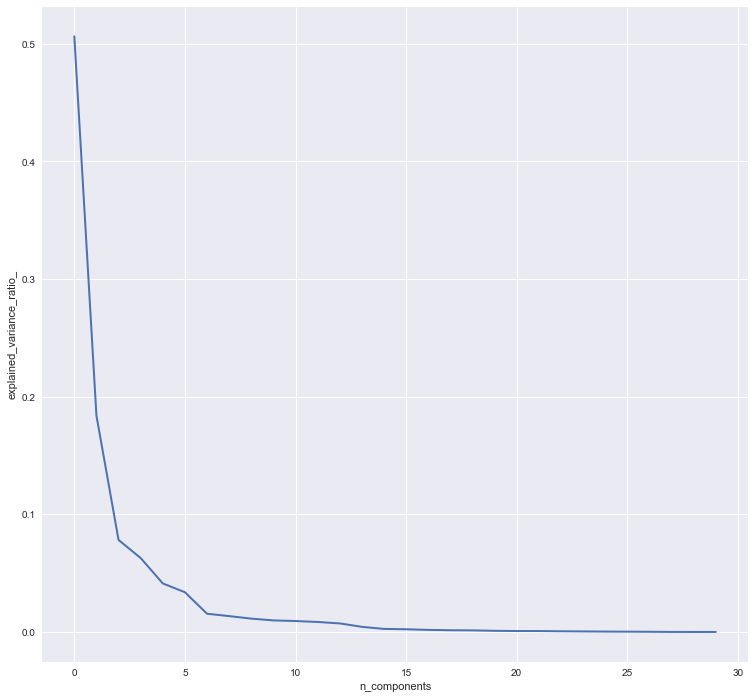

In [11]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train_N)

plt.figure(1, figsize=(14, 13))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')
plt.show()

In [12]:
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(X_train_N)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
# finalDf = pd.concat([principalDf, y_train['diagnosis']], axis = 1)

In [14]:
diag = pd.DataFrame(y_train)
diag.reset_index(inplace=True, drop=True)

In [15]:
finalDf = pd.concat([principalDf, diag['diagnosis']], axis = 1)

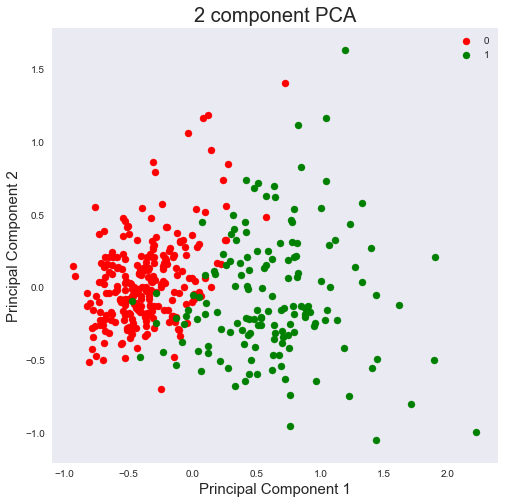

In [16]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['0', '1']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['diagnosis'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
plt.show()

In [25]:
df = pd.DataFrame(pca.components_, columns=list(X_train_N.columns))

In [26]:
df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.232318,0.090130,0.241629,0.205998,0.116639,0.252553,0.285503,0.301733,0.122721,0.045603,...,0.246129,0.108681,0.245570,0.193962,0.137564,0.215490,0.317834,0.369346,0.098023,0.116437
1,-0.277633,-0.039357,-0.256170,-0.243014,0.188030,0.204661,0.079503,-0.035998,0.182346,0.379651,...,-0.255808,-0.019800,-0.221311,-0.205518,0.232730,0.198526,0.171064,0.026212,0.121739,0.306952


In [35]:
sorted_df = df.sort_values(0, axis=1, ascending=False)

In [36]:
sorted_df

,concave points_worst,concavity_worst,concave points_mean,concavity_mean,compactness_mean,radius_worst,perimeter_worst,perimeter_mean,radius_mean,compactness_worst,...,texture_worst,area_se,symmetry_worst,texture_mean,concavity_se,fractal_dimension_se,fractal_dimension_mean,symmetry_se,texture_se,smoothness_se
0,0.369346,0.317834,0.301733,0.285503,0.252553,0.246129,0.245570,0.241629,0.232318,0.215490,...,0.108681,0.100560,0.098023,0.090130,0.064550,0.045937,0.045603,0.029538,0.014263,0.003274
1,0.026212,0.171064,-0.035998,0.079503,0.204661,-0.255808,-0.221311,-0.256170,-0.277633,0.198526,...,-0.019800,-0.094883,0.121739,-0.039357,0.087821,0.157205,0.379651,0.142726,0.086199,0.129392


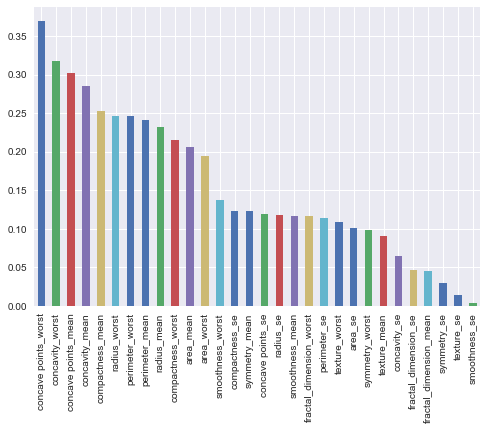

In [37]:
row = sorted_df.iloc[0]
row.plot(kind='bar')
plt.show()

In [55]:
sel_feature = list(sorted_df.columns)[0:21]

In [56]:
sel_feature

['concave points_worst',
 'concavity_worst',
 'concave points_mean',
 'concavity_mean',
 'compactness_mean',
 'radius_worst',
 'perimeter_worst',
 'perimeter_mean',
 'radius_mean',
 'compactness_worst',
 'area_mean',
 'area_worst',
 'smoothness_worst',
 'compactness_se',
 'symmetry_mean',
 'concave points_se',
 'radius_se',
 'smoothness_mean',
 'fractal_dimension_worst',
 'perimeter_se',
 'texture_worst']

In [57]:
feature_X = raw_data[sel_feature]
y = raw_data['diagnosis']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(feature_X, y, test_size = 0.30, random_state=42)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [59]:
svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)

print('The accuracy on the training subset: {:.3f}'.format(svm_model.score(X_train_scaled, y_train)))
print('The accuracy on the testing subset: {:.3f}'.format(svm_model.score(X_test_scaled, y_test)))

The accuracy on the training subset: 0.987
The accuracy on the testing subset: 0.982
